# Movie Review

## Importing Essential Packages

In [ ]:
import pandas as pd
import os

## setting base path

In [ ]:
basepath = '/sentiment/aclImdb'

In [ ]:
labels = {'pos':1,'neg':0}

In [ ]:
df = pd.DataFrame()

## Creating Data

In [ ]:
for s in ('test','train'):
    for l in ('pos','neg'):
        path = os.path.join(basepath,s,l)
        print(path)
        for fil in os.listdir(path):
            
            with open(os.path.join(path,fil),'rb') as f:
                txt = f.read()
            df = df.append([[txt,labels[l]]],ignore_index=True)
            
df.columns=['review','sentiment']

E:\Others\IVY\python\sentiment\aclImdb\test\pos
E:\Others\IVY\python\sentiment\aclImdb\test\neg
E:\Others\IVY\python\sentiment\aclImdb\train\pos
E:\Others\IVY\python\sentiment\aclImdb\train\neg


## Head Of Data

In [ ]:
df.head()

,review,sentiment
0,"b""I went and saw this movie last night after b...",1
1,b'Actor turned director Bill Paxton follows up...,1
2,b'As a recreational golfer with some knowledge...,1
3,"b""I saw this film in a sneak preview, and it i...",1
4,b'Bill Paxton has taken the true story of the ...,1


## Export the file

In [ ]:
df.to_csv('pos_neg.csv',index=False)

## Reading The File

In [ ]:
df = pd.read_csv('pos_neg.csv')

## Shuffle

In [ ]:
from sklearn.utils import shuffle

In [ ]:
df = shuffle(df)

## Head Of SHuffled File

In [ ]:
df.head()

,review,sentiment
7708,"b""Gore hounds beware...this is not your movie....",pos
2823,"b'""You were on your way up and you tripped on ...",pos
40462,b'Strange... I like all this movie crew and da...,neg
48467,"b""The previous poster obviously worked on the ...",neg
8361,b'The Jazz Singer is one of a number of films ...,pos


## Adding length column

#### length contains no. of charecters in review

In [ ]:
df.loc[:,'length'] = df.loc[:,'review'].apply(len)

In [ ]:
df.shape

(50000, 3)

## Descriptive statistics by sentiment

In [ ]:
df.groupby('sentiment').describe()

length                                                        \
             count        mean          std   min    25%    50%      75%   
sentiment                                                                  
neg        25000.0  1301.78492   950.986519  35.0  710.0  979.0  1576.00   
pos        25000.0  1332.22784  1036.781470  68.0  695.0  973.5  1622.25   

                    
               max  
sentiment           
neg         9002.0  
pos        13741.0

## ploting length of positive and negative review

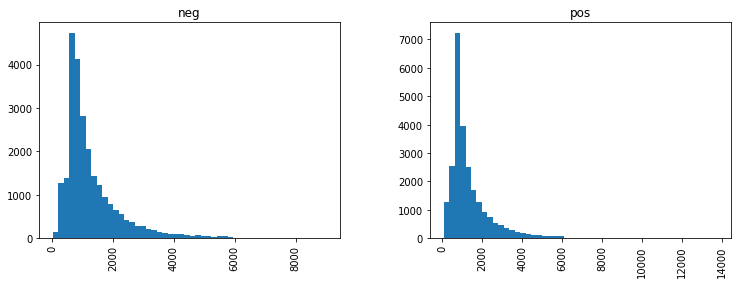

In [ ]:
import matplotlib.pyplot as plt
df.hist(column='length',by='sentiment', bins =50, figsize=(12,4))
plt.show()

## Importing nltk 

In [ ]:
from nltk.corpus import stopwords
import string
import re
stop_words = stopwords.words('english')
stop_words.append('movie')

## cleaning text
### html tags, emoticons and stopwords removal 

In [ ]:
import re
def clean_data(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)',text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    rm_words = [w for w in text.split() if w.lower() not in stop_words]
    return ' '.join(rm_words)
    return text

In [ ]:
clean_data('hello john!-;/.,<>? how are you.. @#$%^&*I am fine movie:')

'hello john fine'

In [ ]:
df.head()

,review,sentiment,length
7708,"b""Gore hounds beware...this is not your movie....",pos,1371
2823,"b'""You were on your way up and you tripped on ...",pos,834
40462,b'Strange... I like all this movie crew and da...,neg,680
48467,"b""The previous poster obviously worked on the ...",neg,754
8361,b'The Jazz Singer is one of a number of films ...,pos,2341


In [ ]:
df['review'] = df['review'].apply(clean_data)

In [ ]:
df.head()

,review,sentiment,length
7708,b gore hounds beware little nail bitter little...,pos,1371
2823,b way tripped skirt gilligan says jim leonard ...,pos,834
40462,b strange like crew dark humor movies like one...,neg,680
48467,b previous poster obviously worked joke bad on...,neg,754
8361,b jazz singer one number films made late 1940 ...,pos,2341


## Convert a collection of text documents to a matrix of token counts

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
bag_of_words = TfidfVectorizer()
bag_of_words.fit(df.review)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
len(bag_of_words.vocabulary_)

104717

In [ ]:
txt_transform = bag_of_words.transform(df.review)

## Shape Of Matrix

In [ ]:
print(txt_transform.shape)

(50000, 104717)


## Training with MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(txt_transform,df.sentiment)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testing With Demo Input

In [ ]:
negative_review = df.iloc[42224][0]
positive_review = df.iloc[3691][0]
new_review = negative_review+positive_review

In [ ]:
def ham_spam(text):
    test = bag_of_words.transform([text])
    return(mn.predict(test)[0])
    

In [ ]:
result = ham_spam(new_review)
new_review

'b research film prior first viewing part welles box set recently purchased box set chiefly got wanted man seasons also evaluate waterloo stick orson rita player treated class confusion equal measure surface story seemed simple one man meets gorgeous woman saves couple thugs click straight away man gets offer work cruise woman famous lawyer husband well becomes murder mystery plotted devilment much shenanigans michael hara orson welles really know going confused viewer wonderful watch pulled place pretty much everyone film obviously pulled heart strings femme fatale beauty elsa bannister rita hayworth moments know things going go pear shaped many wonderful things film welles visual style see scene aquarium marvellous ending sequences fun house majestic eye narration hara joyously self mocking get good light relief way court case everett sloane considerably lighting proceedings yet film oddity fact choppy viewing experience find studio bosses cut film pretty much whole hour frustrating 

In [ ]:
if(result == 1):
    print('you gave positive Review')
else:
    print('you gave negative Review')

you gave negative Review


## Asking user for Review

In [ ]:
import pyttsx3
engine = pyttsx3.init()
engine.say("Please Give Your Thoughts for the movie")
engine.runAndWait() 

# Recording Audio

import pyaudio
import speech_recognition as sr
import wave
import pyttsx3
 
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "file.wav"
 
audio = pyaudio.PyAudio()
r = sr.Recognizer()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")
 
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

harvard = sr.AudioFile('file.wav')
with harvard as source:
    audio = r.record(source)
text = r.recognize_google(audio)
print(text)
engine = pyttsx3.init()
engine.say(text)
engine.runAndWait() 

result = ham_spam(text)
engine = pyttsx3.init()
if(result == 1):
    rs = "you gave positive Review"
else:
    rs = 'you gave negative Review'
print(rs)
engine.say(rs)
engine.runAndWait() 

com_error: (-2147352573, 'Member not found.', None, None)